In [1]:
from call_for_data import make_master_dataframe
from gps_coords_to_call import convert_location_to_gps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# gps = "(39.29088, -76.61076)"
# listgps = list(gps.replace("(", "").replace(")", "").split(","))
# listgps[0] = float(listgps[0])
# listgps[1] = float(listgps[1])
# tuplegps = tuple(listgps)

In [2]:
location = "baltimore"
month = 3
day = 7

In [3]:
gps = convert_location_to_gps(location)
gps
type(gps)

tuple

In [4]:
loc = gps
df1 = make_master_dataframe(loc, month, day)


In [5]:
test_frame = df1
test_frame

,date,temperature_2m,precipitation,cloud_cover,wind_speed_100m
0,2025-02-28 05:00:00,44.869999,0.0,0.0,25.501621
1,2025-02-28 06:00:00,42.980000,0.0,0.0,25.560633
2,2025-02-28 07:00:00,41.629997,0.0,1.0,25.540344
3,2025-02-28 08:00:00,41.540001,0.0,2.0,30.606880
4,2025-02-28 09:00:00,40.910000,0.0,1.0,32.464931
...,...,...,...,...,...
355,1981-03-15 00:00:00,33.935902,0.0,0.0,31.763750
356,1981-03-15 01:00:00,32.945900,0.0,0.0,30.953718
357,1981-03-15 02:00:00,32.225899,0.0,0.0,29.079889
358,1981-03-15 03:00:00,31.595900,0.0,0.0,26.089447


In [ ]:
# step 1 should be to convert UTC to local time
# step 2 should be to split the day from the hour
# step 3 should be groupby hour - should result in 24 groups
# step 4 should be analysis of the group data
#we should probably use boolean to evaluate the chance of rain or clouds

In [6]:
# step 1 - converting to local time
test_frame['local'] = test_frame['date'].dt.tz_localize('utc').dt.tz_convert('America/Chicago')
test_frame = test_frame.drop('date', axis=1)

In [7]:
test_frame

,temperature_2m,precipitation,cloud_cover,wind_speed_100m,local
0,44.869999,0.0,0.0,25.501621,2025-02-27 23:00:00-06:00
1,42.980000,0.0,0.0,25.560633,2025-02-28 00:00:00-06:00
2,41.629997,0.0,1.0,25.540344,2025-02-28 01:00:00-06:00
3,41.540001,0.0,2.0,30.606880,2025-02-28 02:00:00-06:00
4,40.910000,0.0,1.0,32.464931,2025-02-28 03:00:00-06:00
...,...,...,...,...,...
355,33.935902,0.0,0.0,31.763750,1981-03-14 18:00:00-06:00
356,32.945900,0.0,0.0,30.953718,1981-03-14 19:00:00-06:00
357,32.225899,0.0,0.0,29.079889,1981-03-14 20:00:00-06:00
358,31.595900,0.0,0.0,26.089447,1981-03-14 21:00:00-06:00


In [8]:
#create a checkpoint to avoid having to restart kernel
test_frame2 = test_frame

In [9]:
#step 2 - splitting day from hour
test_frame2['Dates'] = pd.to_datetime(test_frame2['local']).dt.date
test_frame2['Time'] = pd.to_datetime(test_frame2['local']).dt.time
test_frame2 = test_frame.drop('local', axis=1)
test_frame2

,temperature_2m,precipitation,cloud_cover,wind_speed_100m,Dates,Time
0,44.869999,0.0,0.0,25.501621,2025-02-27,23:00:00
1,42.980000,0.0,0.0,25.560633,2025-02-28,00:00:00
2,41.629997,0.0,1.0,25.540344,2025-02-28,01:00:00
3,41.540001,0.0,2.0,30.606880,2025-02-28,02:00:00
4,40.910000,0.0,1.0,32.464931,2025-02-28,03:00:00
...,...,...,...,...,...,...
355,33.935902,0.0,0.0,31.763750,1981-03-14,18:00:00
356,32.945900,0.0,0.0,30.953718,1981-03-14,19:00:00
357,32.225899,0.0,0.0,29.079889,1981-03-14,20:00:00
358,31.595900,0.0,0.0,26.089447,1981-03-14,21:00:00


In [10]:
type(test_frame2['Time'])

pandas.core.series.Series

<Axes: xlabel='Time', ylabel='temperature_2m'>

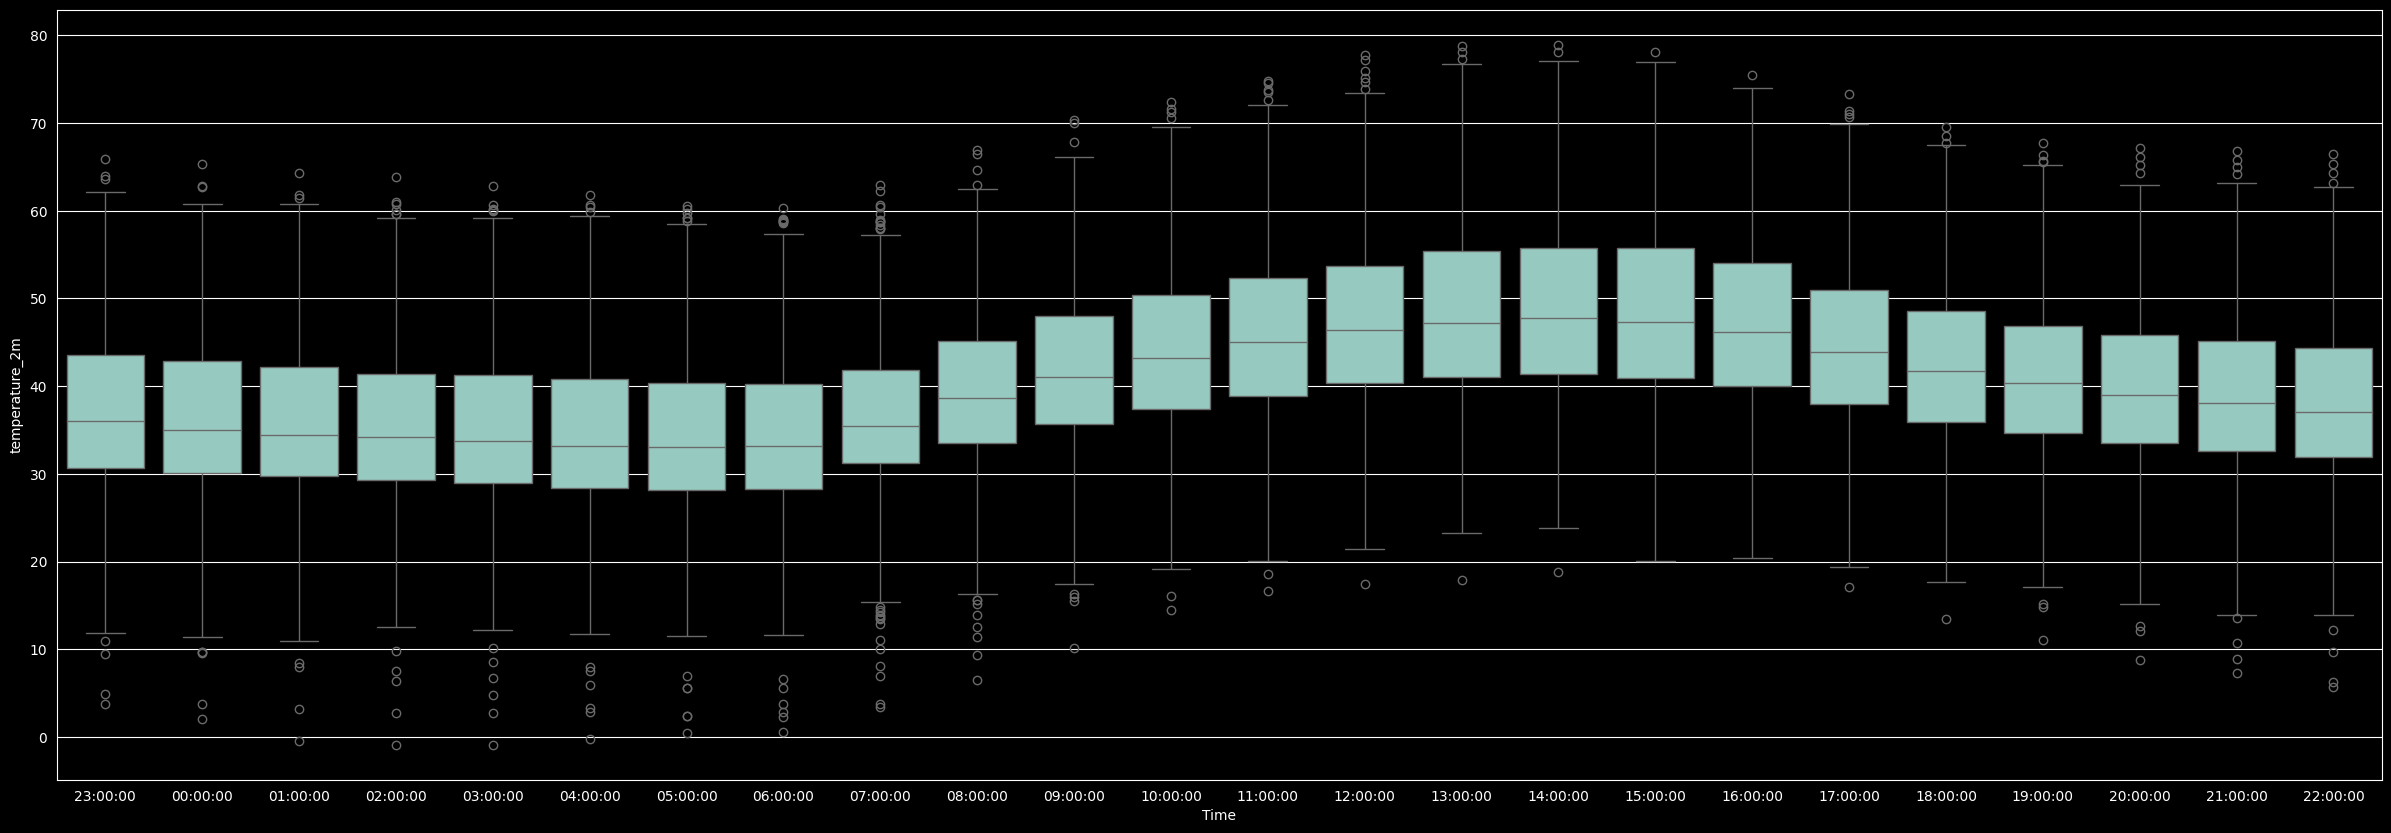

In [11]:
plt.figure(figsize=(30,10))
sns.boxplot(test_frame2, x=test_frame2['Time'], y=test_frame2['temperature_2m'])


In [ ]:
#step 3, group by hour
time_groups = test_frame.groupby('Time')

In [ ]:
#step 4 analysis of data by hour
summary = time_groups.describe()

In [ ]:
summary_plottable = summary['temperature_2m'].drop('count', axis=1)

In [ ]:
summary_plottable

In [ ]:
summary_plottable['mean'].plot()

In [ ]:

#the first thing we should do is group the data by period of day
#currently there is an hourly breakdown - lets take each hour and assign to a group:
# wee hours 00:00-5:00
# morning: 5:00 - 12:00
# afternoon: 12:00-17:00
# evening: 17:00-20:00
# night: 20:00-24:00

In [ ]:
hour_to_filter = 12
filtered_rows = df1[df1['date'].dt.hour == hour_to_filter]

In [ ]:
filtered_rows["temperature_2m"].mean()

In [ ]:
filtered_rows["temperature_2m"].median()

In [ ]:
filtered_rows["temperature_2m"].min()

In [ ]:
filtered_rows["temperature_2m"].max()

In [ ]:
#can we generate a bell curve?

In [ ]:
hours = range(0, 24)
output_dict = {}
for hour in hours:
    hour_to_eval = hour
    filtered_rows = df1[df1['date'].dt.hour == hour_to_eval]
    hour_min = filtered_rows["temperature_2m"].min()
    hour_mean = filtered_rows["temperature_2m"].mean()
    hour_median = filtered_rows["temperature_2m"].median()
    hour_max = filtered_rows["temperature_2m"].max()
    output_dict[hour_to_eval] = (hour_min, hour_mean, hour_median, hour_max)

In [ ]:
output_dict